In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.svm

import utils

In [2]:
def load_dataset_disks(size, seed=123):    
    def get_sample_disk(from_, to, size):
        length = np.random.uniform(from_, to, size)
        angle = np.pi * np.random.uniform(0, 2, size)
        x = length * np.cos(angle)
        y = length * np.sin(angle)
        return np.array(list(zip(x, y)))

    np.random.seed(seed)
    size1 = int(size / 2)
    size2 = size - size1
    X = np.concatenate((get_sample_disk(0, 1, size1), get_sample_disk(1, 2, size2)))
    Y = np.concatenate((np.ones(size1), -np.ones(size2)))
    return X, Y

# SVMs - Kernels

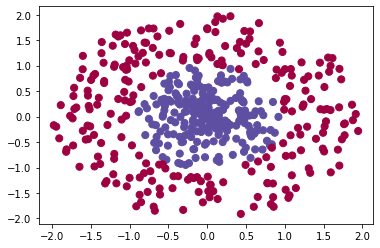

In [3]:
X, Y = load_dataset_disks(500)

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap=plt.cm.Spectral);

### Let's try to use some kernels

Accuracy: 60.4


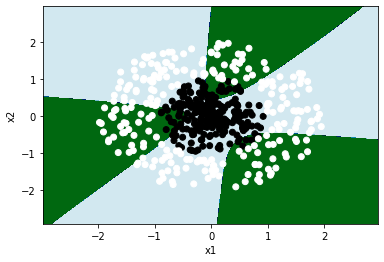

In [4]:
clf = sklearn.svm.SVC(kernel='sigmoid', gamma='auto')
clf.fit(X, Y);

utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

predictions = clf.predict(X)
print(f'Accuracy: {(np.sum(Y == predictions)) / float(Y.size) * 100}')

Accuracy: 99.6


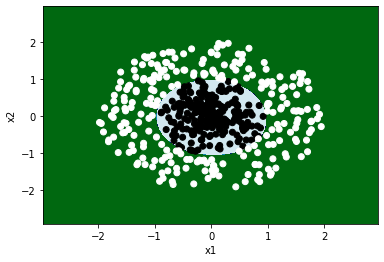

In [5]:
clf = sklearn.svm.SVC(kernel='rbf', gamma='auto')
clf.fit(X, Y);

utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

predictions = clf.predict(X)
print(f'Accuracy: {(np.sum(Y == predictions)) / float(Y.size) * 100}')

Accuracy: 65.0


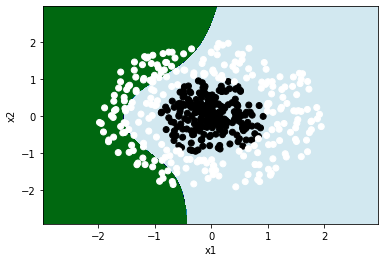

In [6]:
clf = sklearn.svm.SVC(kernel='poly', gamma='auto')
clf.fit(X, Y);

utils.plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.T)

predictions = clf.predict(X)
print(f'Accuracy: {(np.sum(Y == predictions)) / float(Y.size) * 100}')

## An interesting example on how to use SVMs: https://www.kaggle.com/pierra/credit-card-dataset-svm-classification

# What about using train and test?

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Split the dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

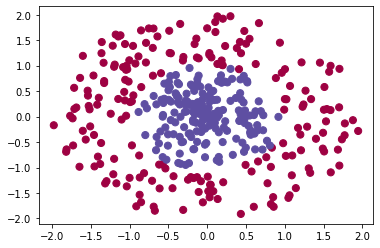

In [9]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap=plt.cm.Spectral);

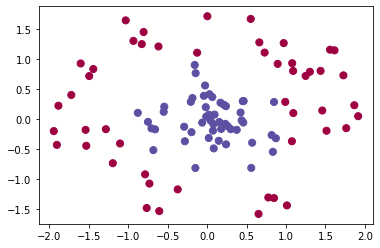

In [10]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=plt.cm.Spectral);

## Classification report on the test data using different kernels

              precision    recall  f1-score   support

        -1.0       0.69      0.37      0.48        49
         1.0       0.58      0.84      0.69        51

    accuracy                           0.61       100
   macro avg       0.64      0.61      0.58       100
weighted avg       0.64      0.61      0.59       100



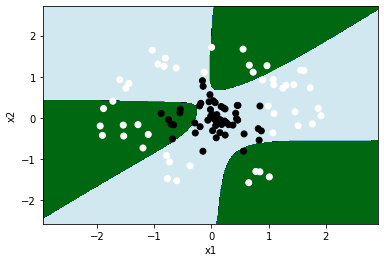

In [11]:
clf = sklearn.svm.SVC(kernel='sigmoid', gamma='auto').fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))

utils.plot_decision_boundary(lambda x: clf.predict(x), X_test.T, y_test.T)

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        49
         1.0       1.00      1.00      1.00        51

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



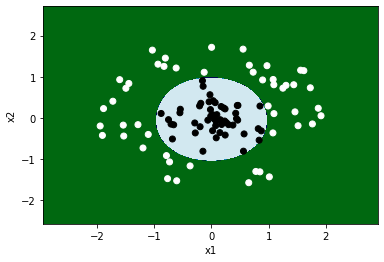

In [12]:
clf = sklearn.svm.SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)

print(classification_report(y_test, clf.predict(X_test)))

utils.plot_decision_boundary(lambda x: clf.predict(x), X_test.T, y_test.T)